# lexicon character level

## InSet

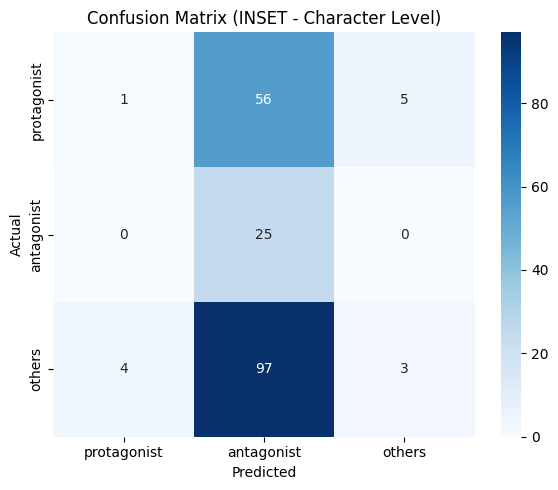


🏆 INSET (Character-Level) Summary:
Precision: 0.2385
Recall:    0.3483
F1-score:  0.1099
📁 Saved in: inset_character_level


In [1]:
import os
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load INSET lexicons
pos_path = "../sentence_level/inset/positive.tsv"
neg_path = "../sentence_level/inset/negative.tsv"

pos_words = pd.read_csv(pos_path, sep="\t", header=0)['word'].str.lower().tolist()
neg_words = pd.read_csv(neg_path, sep="\t", header=0)['word'].str.lower().tolist()

# 2. Load character-level data
df = pd.read_csv("character_level.csv")
df['merged_text'] = df['merged_text'].fillna("").str.lower()

# 3. Classify using INSET
def classify_inset(text):
    pos_count = sum(1 for word in pos_words if word in text)
    neg_count = sum(1 for word in neg_words if word in text)
    if pos_count > neg_count:
        return "protagonist"
    elif neg_count > pos_count:
        return "antagonist"
    else:
        return "others"

df['inset_prediction'] = df['merged_text'].apply(classify_inset)

# 4. Save predictions
save_dir = "inset_character_level"
os.makedirs(save_dir, exist_ok=True)
df.to_csv(os.path.join(save_dir, "character_level_inset_pred.csv"), index=False)

# 5. Evaluate
true = df['type']
pred = df['inset_prediction']

report_dict = classification_report(true, pred, digits=4, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv(os.path.join(save_dir, "classification_report.csv"))

# Summary
macro = report_df.loc["macro avg"]
summary_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-score"],
    "Score": [macro["precision"], macro["recall"], macro["f1-score"]]
})
summary_df.to_csv(os.path.join(save_dir, "summary_metrics.csv"), index=False)

# Confusion matrix
cm = confusion_matrix(true, pred, labels=["protagonist", "antagonist", "others"])
cm_df = pd.DataFrame(cm, index=["protagonist", "antagonist", "others"], columns=["protagonist", "antagonist", "others"])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (INSET - Character Level)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "confusion_matrix.png"))
plt.show()

# Final print
print("\n🏆 INSET (Character-Level) Summary:")
print(f"Precision: {macro['precision']:.4f}")
print(f"Recall:    {macro['recall']:.4f}")
print(f"F1-score:  {macro['f1-score']:.4f}")
print(f"📁 Saved in: {save_dir}")


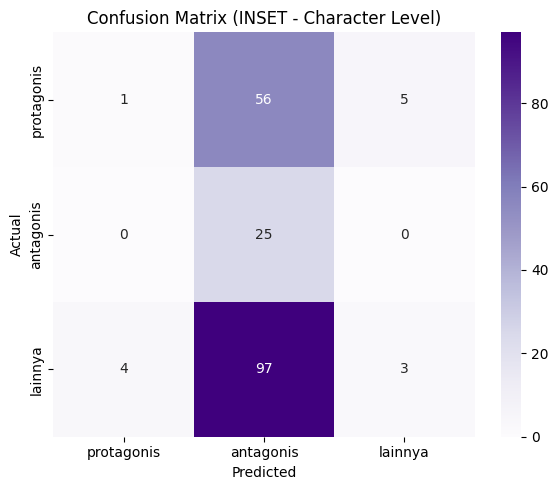


🏆 INSET (Character-Level) Summary:
Accuracy:  0.1518
Precision: 0.2385
Recall:    0.3483
F1-score:  0.1099
📁 Saved in: inset_character_level


In [6]:
import os
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load INSET lexicons
pos_path = "../sentence_level/inset/positive.tsv"
neg_path = "../sentence_level/inset/negative.tsv"

pos_words = pd.read_csv(pos_path, sep="\t", header=0)['word'].str.lower().tolist()
neg_words = pd.read_csv(neg_path, sep="\t", header=0)['word'].str.lower().tolist()

# 2. Load character-level data
df = pd.read_csv("character_level.csv")
df['merged_text'] = df['merged_text'].fillna("").str.lower()

# 3. Classify using INSET
def classify_inset(text):
    pos_count = sum(1 for word in pos_words if word in text)
    neg_count = sum(1 for word in neg_words if word in text)
    if pos_count > neg_count:
        return "protagonist"
    elif neg_count > pos_count:
        return "antagonist"
    else:
        return "others"

df['inset_prediction'] = df['merged_text'].apply(classify_inset)

# 4. Save predictions
save_dir = "inset_character_level"
os.makedirs(save_dir, exist_ok=True)
df.to_csv(os.path.join(save_dir, "character_level_inset_pred.csv"), index=False)

# 5. Evaluate
true = df['type']
pred = df['inset_prediction']

report_dict = classification_report(true, pred, digits=4, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv(os.path.join(save_dir, "classification_report.csv"))

# Summary with Accuracy
macro = report_df.loc["macro avg"]
accuracy = accuracy_score(true, pred)

summary_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Score": [accuracy, macro["precision"], macro["recall"], macro["f1-score"]]
})
summary_df.to_csv(os.path.join(save_dir, "summary_metrics.csv"), index=False)

# 6. Confusion matrix
cm = confusion_matrix(true, pred, labels=["protagonist", "antagonist", "others"])
cm_df = pd.DataFrame(
    cm,
    index=["protagonis", "antagonis", "lainnya"],
    columns=["protagonis", "antagonis", "lainnya"]
)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix (INSET - Character Level)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "confusion_matrix.png"))
plt.show()

# Final print
print("\n🏆 INSET (Character-Level) Summary:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {macro['precision']:.4f}")
print(f"Recall:    {macro['recall']:.4f}")
print(f"F1-score:  {macro['f1-score']:.4f}")
print(f"📁 Saved in: {save_dir}")


## AFINN (ID -> EN)

In [ ]:
import os
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
from afinn import Afinn
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv("character_level.csv")
df['merged_text'] = df['merged_text'].fillna("").astype(str)

# 2. Load Helsinki Indo→English model
tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-id-en")
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-id-en")

# Translation function
def translate_id_to_en(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    translated = model.generate(**inputs)
    return tokenizer.decode(translated[0], skip_special_tokens=True)

# Translate merged_text to English
print("🔄 Translating merged_text to English...")
df['translated_en'] = df['merged_text'].apply(translate_id_to_en)

# 3. AFINN scoring
afinn = Afinn()

def classify_afinn(text):
    score = afinn.score(str(text))
    if score > 0:
        return "protagonist"
    elif score < 0:
        return "antagonist"
    else:
        return "others"

df['afinn_prediction'] = df['translated_en'].apply(classify_afinn)

# 4. Save results
save_dir = "afinn_character_level"
os.makedirs(save_dir, exist_ok=True)
df.to_csv(os.path.join(save_dir, "character_level_afinn_pred.csv"), index=False)

# 5. Evaluate
true = df['type']
pred = df['afinn_prediction']

report_dict = classification_report(true, pred, digits=4, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv(os.path.join(save_dir, "classification_report.csv"))

# Summary
macro = report_df.loc["macro avg"]
summary_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-score"],
    "Score": [macro["precision"], macro["recall"], macro["f1-score"]]
})
summary_df.to_csv(os.path.join(save_dir, "summary_metrics.csv"), index=False)

# Confusion matrix
cm = confusion_matrix(true, pred, labels=["protagonist", "antagonist", "others"])
cm_df = pd.DataFrame(cm, index=["protagonist", "antagonist", "others"], columns=["protagonist", "antagonist", "others"])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix (AFINN - Character Level)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "confusion_matrix.png"))
plt.show()

# Final print
print("\n🏆 AFINN (Character-Level) Summary:")
print(f"Precision: {macro['precision']:.4f}")
print(f"Recall:    {macro['recall']:.4f}")
print(f"F1-score:  {macro['f1-score']:.4f}")
print(f"📁 Saved in: {save_dir}")


c:\Users\rayssa\Documents\nusantara-character-classification\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🔄 Translating merged_text to English...


KeyboardInterrupt: 

🔄 Translating merged_text to English...


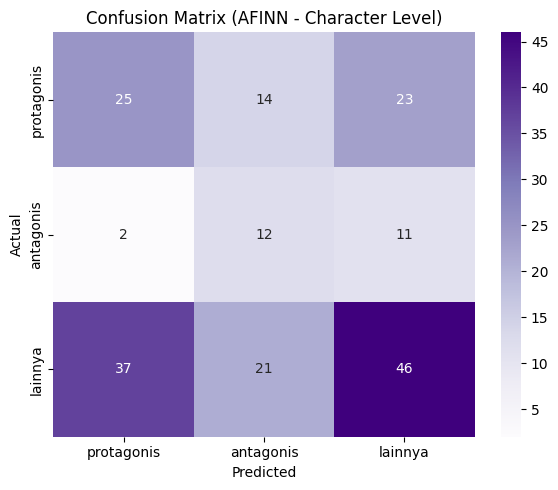


🏆 AFINN (Character-Level) Summary:
Accuracy:  0.4346
Precision: 0.4070
Recall:    0.4418
F1-score:  0.4101
📁 Saved in: afinn_character_level


In [2]:
import os
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
from afinn import Afinn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv("character_level.csv")
df['merged_text'] = df['merged_text'].fillna("").astype(str)

# 2. Load Helsinki Indo→English model
tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-id-en")
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-id-en")

# Translation function
def translate_id_to_en(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    translated = model.generate(**inputs)
    return tokenizer.decode(translated[0], skip_special_tokens=True)

# Translate merged_text to English
print("🔄 Translating merged_text to English...")
df['translated_en'] = df['merged_text'].apply(translate_id_to_en)

# 3. AFINN scoring
afinn = Afinn()

def classify_afinn(text):
    score = afinn.score(str(text))
    if score > 0:
        return "protagonist"
    elif score < 0:
        return "antagonist"
    else:
        return "others"

df['afinn_prediction'] = df['translated_en'].apply(classify_afinn)

# 4. Save results
save_dir = "afinn_character_level"
os.makedirs(save_dir, exist_ok=True)
df.to_csv(os.path.join(save_dir, "character_level_afinn_pred.csv"), index=False)

# 5. Evaluate
true = df['type']
pred = df['afinn_prediction']

report_dict = classification_report(true, pred, digits=4, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv(os.path.join(save_dir, "classification_report.csv"))

# Summary with Accuracy
macro = report_df.loc["macro avg"]
accuracy = accuracy_score(true, pred)

summary_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Score": [accuracy, macro["precision"], macro["recall"], macro["f1-score"]]
})
summary_df.to_csv(os.path.join(save_dir, "summary_metrics.csv"), index=False)

# Confusion Matrix
cm = confusion_matrix(true, pred, labels=["protagonist", "antagonist", "others"])
cm_df = pd.DataFrame(
    cm,
    index=["protagonis", "antagonis", "lainnya"],
    columns=["protagonis", "antagonis", "lainnya"]
)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix (AFINN - Character Level)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "confusion_matrix.png"))
plt.show()

# Final print
print("\n🏆 AFINN (Character-Level) Summary:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {macro['precision']:.4f}")
print(f"Recall:    {macro['recall']:.4f}")
print(f"F1-score:  {macro['f1-score']:.4f}")
print(f"📁 Saved in: {save_dir}")


## VADER

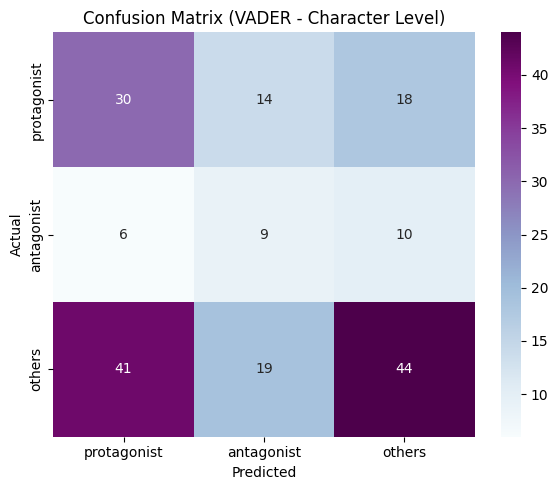


🏆 VADER (Character-Level) Summary:
Precision: 0.4050
Recall:    0.4223
F1-score:  0.4001
📁 Saved in: vader_character_level


In [3]:
import os
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load from AFINN output
df = pd.read_csv("afinn_character_level/character_level_afinn_pred.csv")

# Drop AFINN column if exists
if "afinn_prediction" in df.columns:
    df.drop(columns=["afinn_prediction"], inplace=True)

# 2. VADER scoring
analyzer = SentimentIntensityAnalyzer()

def classify_vader(text):
    score = analyzer.polarity_scores(str(text))['compound']
    if score > 0:
        return "protagonist"
    elif score < 0:
        return "antagonist"
    else:
        return "others"

df['vader_prediction'] = df['translated_en'].apply(classify_vader)

# 3. Save
save_dir = "vader_character_level"
os.makedirs(save_dir, exist_ok=True)
df.to_csv(os.path.join(save_dir, "character_level_vader_pred.csv"), index=False)

# 4. Evaluate
true = df['type']
pred = df['vader_prediction']

report_dict = classification_report(true, pred, digits=4, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv(os.path.join(save_dir, "classification_report.csv"))

macro = report_df.loc["macro avg"]
summary_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-score"],
    "Score": [macro["precision"], macro["recall"], macro["f1-score"]]
})
summary_df.to_csv(os.path.join(save_dir, "summary_metrics.csv"), index=False)

# 5. Confusion matrix
cm = confusion_matrix(true, pred, labels=["protagonist", "antagonist", "others"])
cm_df = pd.DataFrame(cm, index=["protagonist", "antagonist", "others"], columns=["protagonist", "antagonist", "others"])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='BuPu')
plt.title("Confusion Matrix (VADER - Character Level)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "confusion_matrix.png"))
plt.show()

# 6. Final print
print("\n🏆 VADER (Character-Level) Summary:")
print(f"Precision: {macro['precision']:.4f}")
print(f"Recall:    {macro['recall']:.4f}")
print(f"F1-score:  {macro['f1-score']:.4f}")
print(f"📁 Saved in: {save_dir}")


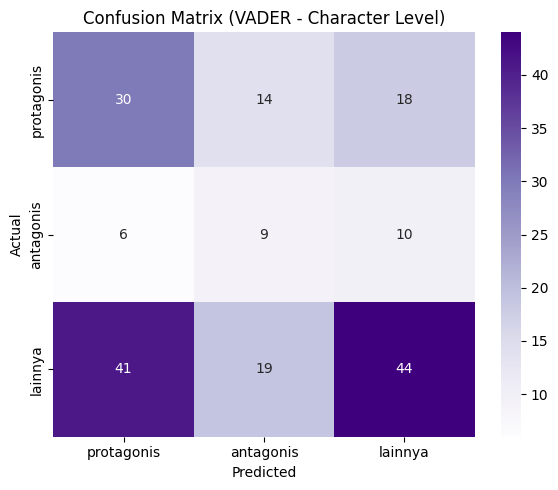


🏆 VADER (Character-Level) Summary:
Accuracy:  0.4346
Precision: 0.4050
Recall:    0.4223
F1-score:  0.4001
📁 Saved in: vader_character_level


In [4]:
import os
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load from AFINN output
df = pd.read_csv("afinn_character_level/character_level_afinn_pred.csv")

# Drop AFINN column if exists
if "afinn_prediction" in df.columns:
    df.drop(columns=["afinn_prediction"], inplace=True)

# 2. VADER scoring
analyzer = SentimentIntensityAnalyzer()

def classify_vader(text):
    score = analyzer.polarity_scores(str(text))['compound']
    if score > 0:
        return "protagonist"
    elif score < 0:
        return "antagonist"
    else:
        return "others"

df['vader_prediction'] = df['translated_en'].apply(classify_vader)

# 3. Save
save_dir = "vader_character_level"
os.makedirs(save_dir, exist_ok=True)
df.to_csv(os.path.join(save_dir, "character_level_vader_pred.csv"), index=False)

# 4. Evaluate
true = df['type']
pred = df['vader_prediction']

report_dict = classification_report(true, pred, digits=4, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv(os.path.join(save_dir, "classification_report.csv"))

# Summary with Accuracy
macro = report_df.loc["macro avg"]
accuracy = accuracy_score(true, pred)

summary_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Score": [accuracy, macro["precision"], macro["recall"], macro["f1-score"]]
})
summary_df.to_csv(os.path.join(save_dir, "summary_metrics.csv"), index=False)

# 5. Confusion matrix
cm = confusion_matrix(true, pred, labels=["protagonist", "antagonist", "others"])
cm_df = pd.DataFrame(
    cm,
    index=["protagonis", "antagonis", "lainnya"],
    columns=["protagonis", "antagonis", "lainnya"]
)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix (VADER - Character Level)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "confusion_matrix.png"))
plt.show()

# 6. Final print
print("\n🏆 VADER (Character-Level) Summary:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {macro['precision']:.4f}")
print(f"Recall:    {macro['recall']:.4f}")
print(f"F1-score:  {macro['f1-score']:.4f}")
print(f"📁 Saved in: {save_dir}")


## Text Blob (ID -> EN)

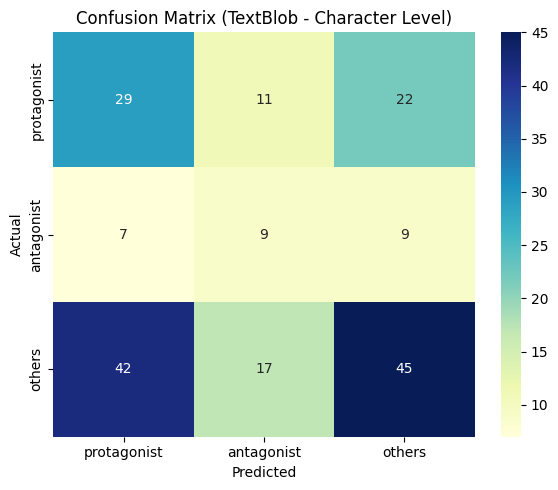


🏆 TextBlob (Character-Level) Summary:
Precision: 0.4024
Recall:    0.4201
F1-score:  0.4015
📁 Saved in: textblob_character_level


In [4]:
import os
import pandas as pd
from textblob import TextBlob
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load translated data
df = pd.read_csv("afinn_character_level/character_level_afinn_pred.csv")

# Drop old prediction
if "afinn_prediction" in df.columns:
    df.drop(columns=["afinn_prediction"], inplace=True)

# 2. Score using TextBlob
def classify_textblob(text):
    score = TextBlob(str(text)).sentiment.polarity
    if score > 0:
        return "protagonist"
    elif score < 0:
        return "antagonist"
    else:
        return "others"

df['textblob_prediction'] = df['translated_en'].apply(classify_textblob)

# 3. Save results
save_dir = "textblob_character_level"
os.makedirs(save_dir, exist_ok=True)
df.to_csv(os.path.join(save_dir, "character_level_textblob_pred.csv"), index=False)

# 4. Evaluate
true = df['type']
pred = df['textblob_prediction']

report_dict = classification_report(true, pred, digits=4, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv(os.path.join(save_dir, "classification_report.csv"))

# Summary
macro = report_df.loc["macro avg"]
summary_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-score"],
    "Score": [macro["precision"], macro["recall"], macro["f1-score"]]
})
summary_df.to_csv(os.path.join(save_dir, "summary_metrics.csv"), index=False)

# 5. Confusion matrix
cm = confusion_matrix(true, pred, labels=["protagonist", "antagonist", "others"])
cm_df = pd.DataFrame(cm, index=["protagonist", "antagonist", "others"], columns=["protagonist", "antagonist", "others"])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix (TextBlob - Character Level)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "confusion_matrix.png"))
plt.show()

# Final print
print("\n🏆 TextBlob (Character-Level) Summary:")
print(f"Precision: {macro['precision']:.4f}")
print(f"Recall:    {macro['recall']:.4f}")
print(f"F1-score:  {macro['f1-score']:.4f}")
print(f"📁 Saved in: {save_dir}")


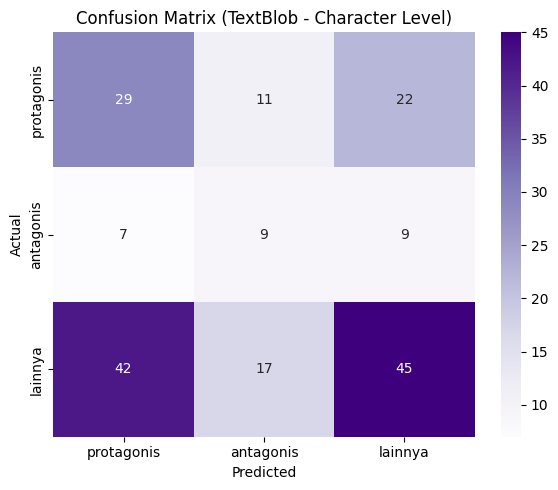


🏆 TextBlob (Character-Level) Summary:
Accuracy:  0.4346
Precision: 0.4024
Recall:    0.4201
F1-score:  0.4015
📁 Saved in: textblob_character_level


In [3]:
import os
import pandas as pd
from textblob import TextBlob
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load translated data
df = pd.read_csv("afinn_character_level/character_level_afinn_pred.csv")

# Drop old prediction
if "afinn_prediction" in df.columns:
    df.drop(columns=["afinn_prediction"], inplace=True)

# 2. Score using TextBlob
def classify_textblob(text):
    score = TextBlob(str(text)).sentiment.polarity
    if score > 0:
        return "protagonist"
    elif score < 0:
        return "antagonist"
    else:
        return "others"

df['textblob_prediction'] = df['translated_en'].apply(classify_textblob)

# 3. Save results
save_dir = "textblob_character_level"
os.makedirs(save_dir, exist_ok=True)
df.to_csv(os.path.join(save_dir, "character_level_textblob_pred.csv"), index=False)

# 4. Evaluate
true = df['type']
pred = df['textblob_prediction']

report_dict = classification_report(true, pred, digits=4, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv(os.path.join(save_dir, "classification_report.csv"))

# Summary with Accuracy
macro = report_df.loc["macro avg"]
accuracy = accuracy_score(true, pred)

summary_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Score": [accuracy, macro["precision"], macro["recall"], macro["f1-score"]]
})
summary_df.to_csv(os.path.join(save_dir, "summary_metrics.csv"), index=False)

# 5. Confusion matrix
cm = confusion_matrix(true, pred, labels=["protagonist", "antagonist", "others"])
cm_df = pd.DataFrame(
    cm,
    index=["protagonis", "antagonis", "lainnya"],
    columns=["protagonis", "antagonis", "lainnya"]
)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix (TextBlob - Character Level)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "confusion_matrix.png"))
plt.show()

# Final print
print("\n🏆 TextBlob (Character-Level) Summary:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {macro['precision']:.4f}")
print(f"Recall:    {macro['recall']:.4f}")
print(f"F1-score:  {macro['f1-score']:.4f}")
print(f"📁 Saved in: {save_dir}")


## SentiWordNet (ID -> EN)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rayssa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rayssa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rayssa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\rayssa\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


🔍 Scoring with SentiWordNet...


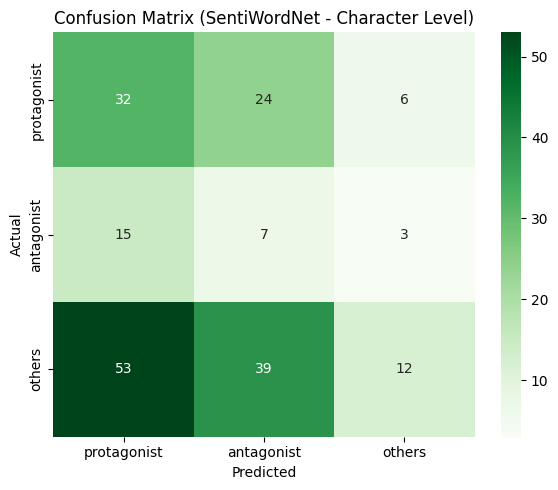


🏆 SentiWordNet (Character-Level) Summary:
Precision: 0.3305
Recall:    0.3038
F1-score:  0.2448
📁 Saved in: sentiwordnet_character_level


In [5]:
import os
import pandas as pd
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk import word_tokenize, pos_tag
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Download if needed
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('sentiwordnet')

# POS mapping
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('V'):
        return wn.VERB
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    else:
        return None

# SentiWordNet classification
def classify_swn(text):
    if not text or pd.isna(text): return "others"
    tokens = word_tokenize(str(text))
    tagged = pos_tag(tokens)
    pos_score = neg_score = count = 0

    for word, tag in tagged:
        wn_tag = get_wordnet_pos(tag)
        if not wn_tag: continue
        synsets = wn.synsets(word, pos=wn_tag)
        if not synsets: continue
        synset = synsets[0]  # first synset
        swn_syn = swn.senti_synset(synset.name())
        pos_score += swn_syn.pos_score()
        neg_score += swn_syn.neg_score()
        count += 1

    if count == 0: return "others"
    final = pos_score - neg_score
    if final > 0:
        return "protagonist"
    elif final < 0:
        return "antagonist"
    else:
        return "others"

# Load data
df = pd.read_csv("afinn_character_level/character_level_afinn_pred.csv")
if "afinn_prediction" in df.columns:
    df.drop(columns=["afinn_prediction"], inplace=True)

# Apply SentiWordNet
print("🔍 Scoring with SentiWordNet...")
df['sentiwordnet_prediction'] = df['translated_en'].apply(classify_swn)

# Save
save_dir = "sentiwordnet_character_level"
os.makedirs(save_dir, exist_ok=True)
df.to_csv(os.path.join(save_dir, "character_level_swn_pred.csv"), index=False)

# Evaluate
true = df['type']
pred = df['sentiwordnet_prediction']

report_dict = classification_report(true, pred, digits=4, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv(os.path.join(save_dir, "classification_report.csv"))

macro = report_df.loc["macro avg"]
summary_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-score"],
    "Score": [macro["precision"], macro["recall"], macro["f1-score"]]
})
summary_df.to_csv(os.path.join(save_dir, "summary_metrics.csv"), index=False)

# Confusion matrix
cm = confusion_matrix(true, pred, labels=["protagonist", "antagonist", "others"])
cm_df = pd.DataFrame(cm, index=["protagonist", "antagonist", "others"], columns=["protagonist", "antagonist", "others"])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (SentiWordNet - Character Level)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "confusion_matrix.png"))
plt.show()

print("\n🏆 SentiWordNet (Character-Level) Summary:")
print(f"Precision: {macro['precision']:.4f}")
print(f"Recall:    {macro['recall']:.4f}")
print(f"F1-score:  {macro['f1-score']:.4f}")
print(f"📁 Saved in: {save_dir}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rayssa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rayssa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rayssa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\rayssa\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


🔍 Scoring with SentiWordNet...


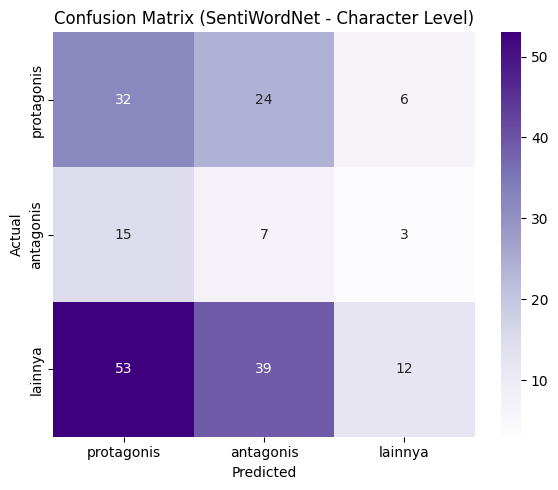


🏆 SentiWordNet (Character-Level) Summary:
Accuracy:  0.2670
Precision: 0.3305
Recall:    0.3038
F1-score:  0.2448
📁 Saved in: sentiwordnet_character_level


In [5]:
import os
import pandas as pd
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk import word_tokenize, pos_tag
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Download if needed
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('sentiwordnet')

# POS mapping
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('V'):
        return wn.VERB
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    else:
        return None

# SentiWordNet classification
def classify_swn(text):
    if not text or pd.isna(text): return "others"
    tokens = word_tokenize(str(text))
    tagged = pos_tag(tokens)
    pos_score = neg_score = count = 0

    for word, tag in tagged:
        wn_tag = get_wordnet_pos(tag)
        if not wn_tag: continue
        synsets = wn.synsets(word, pos=wn_tag)
        if not synsets: continue
        synset = synsets[0]  # first synset
        swn_syn = swn.senti_synset(synset.name())
        pos_score += swn_syn.pos_score()
        neg_score += swn_syn.neg_score()
        count += 1

    if count == 0: return "others"
    final = pos_score - neg_score
    if final > 0:
        return "protagonist"
    elif final < 0:
        return "antagonist"
    else:
        return "others"

# Load data
df = pd.read_csv("afinn_character_level/character_level_afinn_pred.csv")
if "afinn_prediction" in df.columns:
    df.drop(columns=["afinn_prediction"], inplace=True)

# Apply SentiWordNet
print("🔍 Scoring with SentiWordNet...")
df['sentiwordnet_prediction'] = df['translated_en'].apply(classify_swn)

# Save
save_dir = "sentiwordnet_character_level"
os.makedirs(save_dir, exist_ok=True)
df.to_csv(os.path.join(save_dir, "character_level_swn_pred.csv"), index=False)

# Evaluate
true = df['type']
pred = df['sentiwordnet_prediction']

report_dict = classification_report(true, pred, digits=4, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv(os.path.join(save_dir, "classification_report.csv"))

# Summary with Accuracy
macro = report_df.loc["macro avg"]
accuracy = accuracy_score(true, pred)

summary_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Score": [accuracy, macro["precision"], macro["recall"], macro["f1-score"]]
})
summary_df.to_csv(os.path.join(save_dir, "summary_metrics.csv"), index=False)

# Confusion matrix
cm = confusion_matrix(true, pred, labels=["protagonist", "antagonist", "others"])
cm_df = pd.DataFrame(
    cm,
    index=["protagonis", "antagonis", "lainnya"],
    columns=["protagonis", "antagonis", "lainnya"]
)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix (SentiWordNet - Character Level)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "confusion_matrix.png"))
plt.show()

print("\n🏆 SentiWordNet (Character-Level) Summary:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {macro['precision']:.4f}")
print(f"Recall:    {macro['recall']:.4f}")
print(f"F1-score:  {macro['f1-score']:.4f}")
print(f"📁 Saved in: {save_dir}")


In [6]:
import pandas as pd
import os

# Folder name to display label mapping
model_folders = {
    "afinn_character_level": "AFINN",
    "vader_character_level": "VADER",
    "textblob_character_level": "TextBlob",
    "sentiwordnet_character_level": "SentiWordNet",
    "inset_character_level": "INSET"
}

results = []

for folder, model_name in model_folders.items():
    summary_path = os.path.join(folder, "summary_metrics.csv")
    if os.path.exists(summary_path):
        df = pd.read_csv(summary_path)
        precision = df.loc[df["Metric"] == "Precision", "Score"].values[0]
        recall = df.loc[df["Metric"] == "Recall", "Score"].values[0]
        f1 = df.loc[df["Metric"] == "F1-score", "Score"].values[0]
        results.append({
            "Model": model_name,
            "Precision": precision,
            "Recall": recall,
            "F1-score": f1
        })
    else:
        print(f"⚠️ File not found: {summary_path}")

# Create and sort leaderboard
leaderboard = pd.DataFrame(results)
leaderboard = leaderboard.sort_values(by="F1-score", ascending=False)

# Save to CSV
leaderboard.to_csv("character_level_lexicon_leaderboard.csv", index=False)
print("✅ Leaderboard saved to: character_level_lexicon_leaderboard.csv")
print(leaderboard)


✅ Leaderboard saved to: character_level_lexicon_leaderboard.csv
          Model  Precision    Recall  F1-score
0         AFINN   0.406981  0.441844  0.410053
2      TextBlob   0.402381  0.420145  0.401536
1         VADER   0.405002  0.422316  0.400104
3  SentiWordNet   0.330476  0.303838  0.244810
4         INSET   0.238483  0.348325  0.109909
